# COMP5318 - Machine Learning and Data Mining: Assignment 1
<div style="text-align: right"> Due: Tuesday 8 Oct 2019 5:00PM </div>

# Summary
The goal of this assignment is to build a classifier to classify some grayscale images of the size 28x28 into a set of categories. The dimension of the original data is large, so you need to be smart on which method you gonna use and perhaps perform a pre-processing step to reduce the amount of computation. Part of your marks will be a function of the performance of your classifier on the test set.

## Dataset description
The dataset can be downloaded from Canvas. The dataset consists of a training set of 30,000 examples and a test set of 5,000 examples. They belong to 10 different categories. The validation set is not provided, but you can randomly pick a subset of the training set for validation. The labels of the first 2,000 test examples are given, you will analyse the performance of your proposed method by exploiting the 2,000 test examples. It is NOT allowed to use any examples from the test set for training; or it will be considered as cheating. The rest 3,000 labels of the test set are reserved for marking purpose. <br />
Here are examples illustrating sample of the dataset (each class takes one row):

<img src="Dataset_image.jpg" alt="DataSet" title="DataSet" width="450" height="300" />

There are 10 classes in total:<br />
0 T-shirt/Top<br />
1 Trouser<br />
2 Pullover<br />
3 Dress<br />
4 Coat<br />
5 Sandal<br />
6 Shirt<br />
7 Sneaker<br />
8 Bag<br />
9 Ankle boot <br />

### How to load the data
There is a data folder with 4 main files (which can be downloaded from Canvas):
    1. images_training.h5
    2. labels_training.h5
    3. images_testing.h5
    4. labels_testing_2000.h5

To read the hdf5 file and load the data into a numpy array, assuming the **training data files are in the ./data/train** and **testing data file are in ./data/test**. <br /> Use the following code:

Then data would be a numpy array of the shape (30000, 784), and
label would be a numpy array of the shape (30000, ).
The file images_testing.h5 can be loaded in a similar way.

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from scipy.sparse import csr_matrix

In [2]:
with h5py.File('images_training.h5','r') as H:
    data_train = np.copy(H['datatrain'])
with h5py.File('labels_training.h5','r') as H:
    label_train = np.copy(H['labeltrain'])

print(data_train.shape,label_train.shape)

(30000, 784) (30000,)


In [3]:
#check the maximum and minimum dataset
print(np.max(data_train))
print(np.min(data_train))

1.0
0.0


In [4]:
#create label and training data
label_train = pd.DataFrame(label_train) 
data_train = pd.DataFrame(data_train) 
data_train.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.070588,0.396078,...,0.639216,0.596078,0.486275,0.517647,0.164706,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.521569,...,0.352941,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.003922,0.0,0.0,0.286275,0.219608,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.086275,...,0.223529,0.250980,0.125490,0.000000,0.007843,0.0,0.0,0.0,0.0,0.0


In [5]:
#quickly check our labls
label_train.head()

,0
0,0
1,3
2,7
3,3
4,0


In [6]:
print(data_train.head())
print(data_train.info())
print("\n Shape of our dataset:", data_train.shape)

   0    1    2    3    4         5    6    7         8         9   ...   \
0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.070588  0.396078 ...    
1  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.000000  0.521569 ...    
2  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.000000  0.000000 ...    
3  0.0  0.0  0.0  0.0  0.0  0.003922  0.0  0.0  0.286275  0.219608 ...    
4  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.000000  0.086275 ...    

        774       775       776       777       778  779  780  781  782  783  
0  0.639216  0.596078  0.486275  0.517647  0.164706  0.0  0.0  0.0  0.0  0.0  
1  0.352941  0.000000  0.000000  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  
2  0.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  
3  0.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  
4  0.223529  0.250980  0.125490  0.000000  0.007843  0.0  0.0  0.0  0.0  0.0  

[5 rows x 784 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3

In [7]:
#check for Nan value
null = data_train.isnull().sum()
print(null[null != 0])

Series([], dtype: int64)


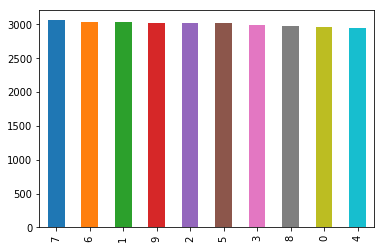

In [8]:
#check if our data is imbalance
_ = label_train[0].value_counts().plot(kind='bar')
plt.show()

In [9]:
# Create a dictionary for each type of label 
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

def get_classes_distribution(data):
    # Get the count for each label
    label_counts = label_train[0].value_counts()

    # Get total number of samples
    total_samples = len(data)


    # Count the number of items in each class
    for i in range(len(label_counts)):
        label = labels[label_counts.index[i]]
        count = label_counts.values[i]
        percent = (count / total_samples) * 100
        print("{:<20s}:   {} or {}%".format(label, count, percent))

get_classes_distribution(data_train)

Sneaker             :   3053 or 10.176666666666668%
Shirt               :   3035 or 10.116666666666667%
Trouser             :   3022 or 10.073333333333332%
Ankle Boot          :   3014 or 10.046666666666667%
Pullover            :   3011 or 10.036666666666667%
Sandal              :   3008 or 10.026666666666667%
Dress               :   2984 or 9.946666666666665%
Bag                 :   2966 or 9.886666666666667%
T-shirt/top         :   2960 or 9.866666666666667%
Coat                :   2947 or 9.823333333333334%


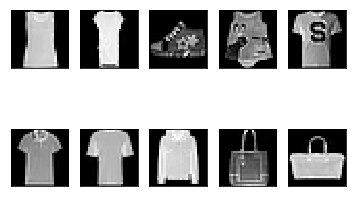

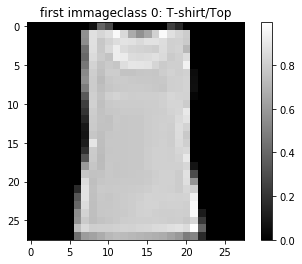

In [10]:
data_train_preview = data_train.values.reshape((data_train.shape[0], 28, 28))

    
train_preview = data_train
images = range(10)
    
subset = train_preview.iloc[images,:]
    
subset.index = range(1, 11)    
    
for i, row in subset.iterrows():
        
    plt.subplot(2, 5, i)
    pixel = row.values.reshape((28,28))
    plt.imshow(pixel, cmap=plt.get_cmap('gray'))
    plt.xticks([])
    plt.yticks([])
    
plt.figure()
plt.imshow(data_train_preview[0], cmap=plt.get_cmap('gray'))
plt.title("first immage" + "class " + str(label_train.at[0,0]) + ": T-shirt/Top" )
plt.colorbar()
plt.grid(False)
    
plt.show()

In [113]:
# using H['datatest'], H['labeltest'] for test dataset.

with h5py.File('images_testing.h5','r') as H:
    data_test = np.copy(H['datatest'])
with h5py.File('labels_testing_2000.h5','r') as H:
    label_test = np.copy(H['labeltest'])
    data_test = data_test[0:2000,]

print(data_test.shape,label_test.shape)

(2000, 784) (2000,)


In [114]:
#create label and training data
label_test = pd.DataFrame(label_test) 
data_test = pd.DataFrame(data_test) 
data_test.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.588235,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.137255,...,0.372549,0.0,0.0,0.011765,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.062745,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.027451,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


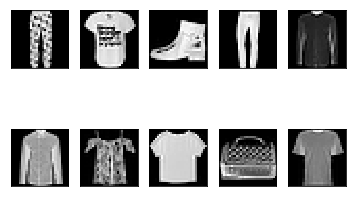

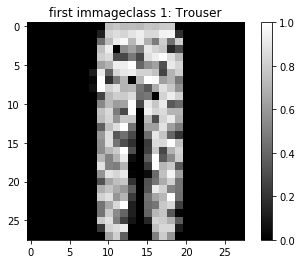

In [13]:
data_test_preview = data_test.values.reshape((data_test.shape[0], 28, 28))

#Show the first n test data

test_preview = data_test
images = range(10)
    
subset = test_preview.iloc[images,:]
    
subset.index = range(1, 11)
    
for i, row in subset.iterrows():
        
    plt.subplot(2, 5, i)
    pixel = row.values.reshape((28,28))
    plt.imshow(pixel, cmap=plt.get_cmap('gray'))
    plt.xticks([])
    plt.yticks([])
    
plt.figure()
plt.imshow(data_test_preview[0], cmap=plt.get_cmap('gray'))
plt.title("first immage" + "class " + str(label_test.at[0,0]) + ": Trouser" )
plt.colorbar()
plt.grid(False)
    
plt.show()

# Random Forest < online algorithm >

In [14]:
from scipy import stats
from scipy.stats import entropy

In [47]:
#Class for our Random Forest model
class RandomForest():
    
    #Create our fit function: use this to fit the model
    def fit(self, x, y, size, n_trees = 6, depth=10, min_leaf=5):
        np.random.seed(100)
        #populate our variables
        self.x, self.y, self.size, self.depth, self.min_leaf  = x.values, y.values, size, depth, min_leaf
        #create trees based on the number of n_trees
        self.trees = [self.create_tree() for i in range(n_trees)]

    #This model is use to create trees to populate our forest
    def create_tree(self):
        
        #randomly select sample for each tree
        sample_idx = np.random.permutation(len(self.y))[:self.size]
        print("List of selected sample used in our tree:",sample_idx)
        
        #list of index based on the size of our each tree size
        self.id = np.array(range(len(sample_idx)))
        #call the decision tree function
        return DecisionTree(self.x[sample_idx], self.y[sample_idx],
                            self.id, 
                            depth = self.depth, 
                            min_leaf = self.min_leaf)
    
    #Use this to create prediction; we'll use the mode to pick the most common result
    def predict(self, x):
        return stats.mode([t.predict(x) for t in self.trees], axis=0)

#Class for the decission tree to populate our Random Forest models

class DecisionTree():
    
    #Function to create the trees
    def __init__(self, x, y,id,depth=10, min_leaf=5):
        self.x, self.y, self.id, self.min_leaf = x, y, id, min_leaf
        self.depth = depth
        self.n = len(id)
        self.col_x = x.shape[1]
        self.val = np.mean(y[id])
        self.score = np.inf
        self.find_split()
    
    #define the split for our tree and recall the Dicision Tree to create the lower child/ branch
    def find_split(self):
        for i in range(self.col_x): self.best_split(i)
        if self.score == np.inf or self.depth <= 0: return 
        x = self.x[self.id,self.var_id]
        
        #get the index on left and right
        left = np.nonzero(x<=self.split)[0]
        right = np.nonzero(x>self.split)[0]
        
        #create the decision tree based on the index we have
        self.left = DecisionTree(self.x, self.y, self.id[left], depth=self.depth-1, min_leaf=self.min_leaf)
        self.right = DecisionTree(self.x, self.y, self.id[right], depth=self.depth-1, min_leaf=self.min_leaf)

    def std(self,count, s1, s2): return np.sqrt((s2/count) - (s1/count)**2)
    
    #Detremine the best split for our dataset
    def best_split(self, var_id):
        x, y = self.x[self.id,var_id], self.y[self.id]
        sort_i = np.argsort(x, kind = "mergesort")
        sort_y,sort_x = y[sort_i], x[sort_i]        
        
        rhs_cnt,rhs_sum,rhs_sum2 = self.n, sort_y.sum(), (sort_y**2).sum()
        lhs_cnt,lhs_sum,lhs_sum2 = 0,0.,0.

        for i in range(0,self.n-self.min_leaf-1):
            lhs_cnt += 1; rhs_cnt -= 1
            lhs_sum += sort_y[i]; rhs_sum -= sort_y[i]
            lhs_sum2 += sort_y[i]**2; rhs_sum2 -= sort_y[i]**2
            if i<self.min_leaf or sort_x[i]==sort_x[i+1]:
                continue

            lhs_std = self.std(lhs_cnt, lhs_sum, lhs_sum2)
            rhs_std = self.std(rhs_cnt, rhs_sum, rhs_sum2)
            curr_score = lhs_std*lhs_cnt + rhs_std*rhs_cnt
            if curr_score<self.score: 
                self.var_id,self.score,self.split = var_id,curr_score,sort_x[i]
    
    #Function to create our prediction
    def predict(self, x):
        return np.array([self.predict_row(xi) for xi in x])

    def predict_row(self, xi):
        if self.score == float('inf') or self.depth <= 0: return self.val
        t = self.left if xi[self.var_id]<=self.split else self.right
        return t.predict_row(xi)

In [48]:
import time
rf = RandomForest()
start = time.time()

#best test: data_train.iloc[:20000,:], labels[:20000], size = 300, n_trees = 20, depth=10; acc:74%
rf = RandomForest()
model = rf.fit(data_train.iloc[:20000,:], label_train.iloc[:20000], size = 50, n_trees = 10, depth=8, min_leaf = 1)

print("--- %s sec ---" % (time.time() - start))

List of selected sample used in our tree: [ 2917  2234 14396  1781 11102   732  7692 10589 16098  4920  6601  7611
  3825 18755  6862  3847  7256 13711 12389  9772  2535 11564 14222  1017
 10121 13672 11271   124 10457  2829   439  2110 13636  7523 11490 14473
 18324  5413  4977  4063  5964 13875 12475  5723 19565  6222 19889 17676
 12013   189]
List of selected sample used in our tree: [19506 11313  3213  9770  4511  9531 16313 10205 15042 16041 19325 13244
 16813 13728 14950  8149 12024 11006 13423  6157  1877 14306 11452 19574
 18976  8531 15613  1736 17705 12003  2509 19233 11162  5643  6571  9041
 13557 13260 13190 15996  6929  1647 17595  8223 16027 14205 19708  8518
  3376 14421]
List of selected sample used in our tree: [ 9799 19176  3128 15991  5545  8528  5646  7448  6114 18785  7150  7479
  3331  2067 10972  8737 18602 10519  9047  8485  1454 14353  4362  6928
  2753  4390 15909  1510  6467 17149  5216  2878  5503 18516 16346  7098
 14005  7523  9597  6324 14924  6458   775 

In [53]:
pred = rf.predict(x = data_test.values)

In [54]:
pred = pred[0].astype(int)
pred = pd.DataFrame(pred[0])[0]

In [55]:
# Calculate accuracy
def accuracy(y, pred):
    n = 0
    for i in range(len(y)):
        if y[i] == pred[i]:
            n += 1
    return n / int(len(y))

In [56]:
acc = accuracy(label_test.values, pred.values)
print("Accuracy: {0:.00%}".format(acc))

Accuracy: 51%


# Random Forest

In [109]:
#Class for our Random Forest model
class RandomForest():
    
    #Create our fit function: use this to fit the model
    def fit(self, x, y, size, n_trees = 6, depth=10):
        np.random.seed(100)
        #populate our variables
        self.x, self.y, self.size, self.depth  = x.values, y.values, size, depth
        #create trees based on the number of n_trees
        self.trees = []
        for i in range(n_trees):
            self.trees.append(self.create_tree())

    #This model is use to create trees to populate our forest
    def create_tree(self):
        
        #randomly select sample for each tree
        sample_idx = np.random.permutation(len(self.y))[:self.size]
        print("List of selected sample used in our tree:",sample_idx)
        
        #list of index based on the size of our each tree size
        self.id = np.array(range(len(sample_idx)))
        
        #call the decision tree function
        return DecisionTree(self.x[sample_idx], self.y[sample_idx],
                            self.id, 
                            depth = self.depth)
    
    #Use this to create prediction; we'll use the mode to pick the most common result
    def predict(self, x):
        return stats.mode([i.predict(x) for i in self.trees], axis=0)

#Class for the decission tree to populate our Random Forest models

class DecisionTree():
    
    #Function to create the trees. Here we put in all the variables
    def __init__(self, x, y,id,depth=10):
        self.x, self.y, self.id = x, y, id
        self.depth = depth
        self.length = len(self.id)
        self.col_x = x.shape[1]
        self.val = np.mean(y[self.id])
        self.score = np.inf
        self.find_split()
    
    #define the split for our tree and recall the Dicision Tree to create the lower child/ branch
    def find_split(self):
        #go to all column of x to find the best split
        for i in range(self.col_x): self.fast_split(i)
        if self.score == np.inf or self.depth <= 0: return 
        x = self.x[self.id,self.varidx]
        left, right = self.id[np.where(x<=self.split)[0]], self.id[np.where(x>self.split)[0]]
        #create the decision tree based on the index we have
        self.left = DecisionTree(self.x, self.y, left, 
                                 depth=self.depth-1)
        self.right = DecisionTree(self.x, self.y, right, 
                                  depth=self.depth-1)
    
  
    
    def fast_split(self, varidx):
        x, y = self.x[self.id,varidx], self.y[self.id]
        
        #sort our values
        sort_i = np.argsort(x, kind = "heapsort")
        sort_y,sort_x = y[sort_i], x[sort_i]        
        
        left = list(sort_y)
        right_count,right_sum,right_sum2,right = 0,0.,0.,[]

        for i in range(0,self.length-2):
            a = left.pop(0)
            right_count += 1
            right.append(a)
            
            if i<1 or sort_x[i]==sort_x[i+1]:
                continue

            #calculate the standard deviation
            left_std = np.std(left)
            right_std = np.std(right)
            
            #use std to get our score
            curr_score = left_std*(self.length - right_count) + right_std  * (right_count)
            
            #Here we'll record the best split
            if curr_score<self.score: 
                self.varidx,self.score,self.split = varidx,curr_score,sort_x[i]                                      
                    
                
    #Function to create our prediction
    def predict(self, data):
        return np.array([self.pred(xi) for xi in data])

    def pred(self, xi):
        if self.score == float('inf') or self.depth <= 0: return self.val
        t = self.left if xi[self.varidx]<=self.split else self.right
        return t.pred(xi)

In [110]:
import time
rf = RandomForest()

start = time.time()

#best test: rf.fit(data_train.iloc[:20000,:], label_train.iloc[:20000], size = 150, n_trees = 12, depth=8) time: 550sec
rf = RandomForest()
model = rf.fit(data_train.iloc[:20000,:], label_train.iloc[:20000], size = 150, n_trees = 12, depth=8)

List of selected sample used in our tree: [ 2917  2234 14396  1781 11102   732  7692 10589 16098  4920  6601  7611
  3825 18755  6862  3847  7256 13711 12389  9772  2535 11564 14222  1017
 10121 13672 11271   124 10457  2829   439  2110 13636  7523 11490 14473
 18324  5413  4977  4063  5964 13875 12475  5723 19565  6222 19889 17676
 12013   189 18835 16797  5863  6764  1964   162  4074  9458 11046  3144
  4440 13517 16567  4773  7068 16179 18386  1625 16401 13693  8799  2525
  7094 19725 18035  4893  8142  2370  8536 19852  1713  7955  2975 12306
 16917  3557 13461 14627 16329  5254 12605 13057   630 11888 10267  9175
  1470  5324  1284 14330  2218  2943 14577 16072  7466  8838 18829 10406
 17160  1983  8469 17776  6661  1951 10520 12144  4347 10885  9967 19742
 13802  4348 12748  8063  3387  1257 17581 10147 18772  8782 14409 14677
  7107 16500  9659 13144 13152  2356 18675  8829 16042  9594 12259  9752
  2545 16077  6219 11089  6421  4369]
List of selected sample used in our tree: [1

List of selected sample used in our tree: [17884 13909  7100  4510 16995  8997  8855 13922 10703 17750    25  5973
  2064  7728  9285  8313  9653   731 11099 15477  7451  8543 12698  2197
  9833 14214 14313  4722  7947  3572 19720 12312  2118 10420 19216 15527
  3536   757  4768 18957 18181    38 10151  5987   148 14646  1456  7050
  3492 11997   416  3004  2995 16837 10257 14635 18938  5606 19009  6240
   287 14821 10492  7830  4015 12059  5672  8816  3687 10203 14610 19977
 13643  4211  7085  3265 12447 11643 11382  8310  5213 12769  6045  8409
 12370 17675 19536 16667 17929 18729 14822  7066 14139  5133 17744 18480
 11322 12998 17201  6239  1051 19951  1879    64 14640  2390  9320 12001
 12898 19623  3308 15016  8480 17324  8981 13551  3694 19169  1121   274
 11352 10260  8771 10035  8714 19890  9071  6786 15507  5206  2440 13175
  5466 12989 10827 10475  2078  3202  5354  8453  1935 11238  2490 14533
  1230 17401  6536  7945  3333 11974]
List of selected sample used in our tree: [1

In [111]:
data_validation = data_train.iloc[20000:30000,:]
y = label_train.iloc[20000:30000].values
pred = rf.predict(x = data_validation.values)
pred = pred[0].astype(int)
pred = pd.DataFrame(pred[0])[0]

# Calculate accuracy
def accuracy(y, pred):
    n = 0
    for i in range(len(y)):
        if y[i] == pred[i]:
            n += 1
    return n / int(len(y))

acc = accuracy(y, pred.values)
print("Accuracy: {0:.00%}".format(acc))
print("%s sec" % (time.time() - start))

Accuracy: 71%
546.551365852356 sec


In [115]:
pred = rf.predict(x = data_test.values)
pred = pred[0].astype(int)
pred = pd.DataFrame(pred[0])[0]

# Calculate accuracy
def accuracy(y, pred):
    n = 0
    for i in range(len(y)):
        if y[i] == pred[i]:
            n += 1
    return n / int(len(y))

acc = accuracy(label_test.values, pred.values)
print("Accuracy: {0:.00%}".format(acc))
print("--- %s sec ---" % (time.time() - start))

Accuracy: 70%
--- 575.789764881134 sec ---


https://towardsdatascience.com/random-forests-and-decision-trees-from-scratch-in-python-3e4fa5ae4249

# Prepare Labels For Our Output

In [130]:
# using H['datatest'], H['labeltest'] for test dataset.

with h5py.File('images_testing.h5','r') as H:
    data_test_fin = np.copy(H['datatest'])

print(data_test_fin.shape)

(10000, 784)


In [138]:
output = rf.predict(x = data_test_fin)
output = output[0].astype(int)
output = pd.DataFrame(output[0])[0]

### How to output the prediction
Output a file “predicted_labels.h5” that can be loaded in the same way as above. You may use the following code to generate an output file that meets the requirement:

In [1]:
# assume output is the predicted labels
with h5py.File('predicted_labels.h5','w') as H:
    H.create_dataset('output',data=output.values)

NameError: name 'h5py' is not defined

We will load the output file using the code for loading data above. It is your responsibility to make sure the output file can be correctly loaded using this code.
The performance of your classifier will be evaluated in terms of the top-1 accuracy metric, i.e.<br /><br />
<div style="text-align: center"> $$\text{Accuracy} = \frac{\text{Number of correct classifications}}{\text{Total number of test examples used}} * 100\%$$

## Task description
Each group consists of 3 students. Your task is to determine / build a classifier for the given data set to classify images into categories and write a report. The score allocation is as follows:
    * Classifier (code): max 20 points
    * Report: max 80 points
Please refer to the rubric in Canvas for detailed marking scheme. The report and the code are to be submitted in Canvas by the due date.<br />
This assignment must be submitted in Python3. Although you are allowed to use external libraries for optimisation and linear algebraic calculations, you are NOT allowed to use external libraries for basic pre-processing or classification. For instance, you are allowed to use scipy.optimize for gradient descent or scipy.linalg.svd for matrix decomposition. However, you are NOT allowed to use sklearn.svm for classification (i.e. you have to implement the classifier yourself). If you have any ambiguity whether you can use a particular library or a function, please refer to Canvas -> Modules -> ”Assignment 1 FAQs” for clarification.

## Instructions to hand in the assignment
### Go to Canvas -> Assignments -> "Assignment 1" and submit 2 files only: the report and the code file.
1) Report (a .pdf file): The report should include each member’s details (student IDs and names)<br />
2) Code (a .ipynb file): The code must be able to be run with the following folder structure:
    - Algorithm (the root folder): Your .ipynb file containing Python code will be placed on this folder when we test and run your code. 
    - Input (a sub-folder under Algorithm): We will copy the test dataset into this Input folder when we test and run your code. Please make sure your code is able to read the test dataset from this Input folder.
    - Output (a sub-folder under Algorithm): Your code must be able to generate a prediction file named “predicted_labels.h5” to be saved in this Output folder. The prediction file should contain predicted labels of the test dataset. We will use your prediction output file for grading purpose.

Since this is a group work, only one student from your group needs to submit all the files which must be named with student ID numbers of all your group members separated by underscores e.g. “SID1xxxx_SID2xxxx_SID3xxxx.pdf”,  “SID1xxxx_SID2xxxx_SID3xxxx.ipynb”.

### Your submission should include the report and the code. 
A plagiarism checker will be used. Clearly provide instructions on how to run your code in the Appendix section of your report.

### The report must clearly show :
    1. Details of your classifier 
    2. The predicted results from your classifier on test examples
    3. Run-time
    4. Hardware and software specifications of the computer that you used for performance evaluation

### A template for writing the report 
Note that you have to strictly follow the format of the template. The maximum length of the report is 20 (including references).

### A penalty of MINUS 20 percent (-20%) for each day after the due date. 
The maximum delay for assignment submission is 5 (five) days, after which assignment will not be accepted.

**You should upload your assignment at least half a day or one day prior to the submission deadline to avoid network congestion**.

Canvas may not be able to handle a large number of submission happening at the same time. If you submit your assignment at a time close to the deadline, a submission error may occur causing your submission to be considered late. Penalty will be applied to late submission regardless of issues. 

### All files required for assignment 1 can be downloaded from Canvas -> Assignments -> Assignment 1
